In [1]:
library(tidyverse)
library(cowplot)

palette <- c('HSIC Lasso' = '#c994c7', 'HSIC Lasso, B = 50' = '#df65b0',
             'HSIC Lasso, B = 20' = '#e7298a', 'HSIC Lasso, B = 10' = '#ce1256',
             'HSIC Lasso, B = 5' = '#67001f',
             'LogisticRegressionCV' = '#2171b5', 'mRMR' = '#238443')
methods <- c('HSIC Lasso', 'HSIC Lasso, B = 50',
             'HSIC Lasso, B = 40','HSIC Lasso, B = 30',
             'HSIC Lasso, B = 20','HSIC Lasso, B = 10',
             'HSIC Lasso, B = 5', 'mRMR', 'LogisticRegressionCV')
samples <-  c('100 samples', '1000 samples', '10000 samples')
feats <-  c('1000 features', '2500 features', '5000 features', '10000 features')

summarize_benchmark <- function(x) {
    
    label <- strsplit(x, '/') %>% unlist %>% .[4] %>% gsub('_prediction.tsv', '', .)
    
    read_tsv(x, col_types = 'ciiiiid') %>%
        mutate(model = gsub('hsic_lasso', 'HSIC Lasso', model),
               model = gsub('-b', ', B = ', model)) %>%
        group_by(model) %>%
        summarize(n = n(), ended = sum(!is.na(accuracy)),
                  sem = sd(accuracy) / sqrt(ended), accuracy = mean(accuracy) ) %>%
        ungroup %>%
        mutate(label = label)

}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



Warning message:
“Removed 1 rows containing missing values (geom_bar).”

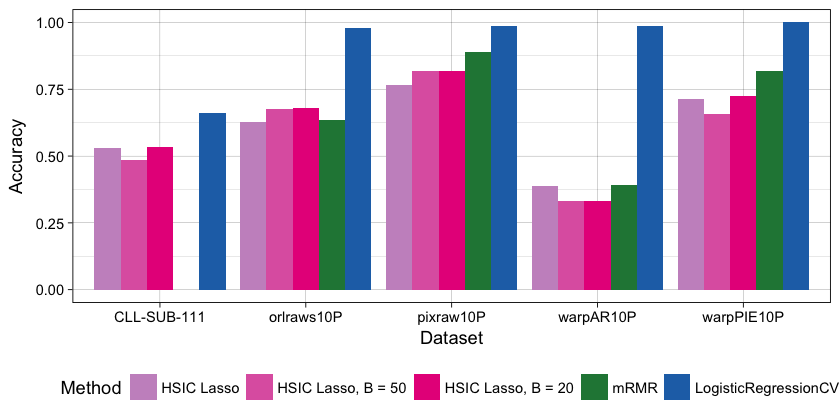

In [2]:
CLLSUB111 <- summarize_benchmark('../results/asu/CLL-SUB-111_prediction.tsv')
pixraw10P <- summarize_benchmark('../results/asu/pixraw10P_prediction.tsv')
warpAR10P <- summarize_benchmark('../results/asu/warpAR10P_prediction.tsv')
orlraws10P <- summarize_benchmark('../results/asu/orlraws10P_prediction.tsv')
warpPIE10P <- summarize_benchmark('../results/asu/warpPIE10P_prediction.tsv')

predictions <- bind_rows(CLLSUB111, pixraw10P, warpAR10P, orlraws10P, warpPIE10P) %>%
    mutate(model = factor(model, levels = methods))

options(repr.plot.width=7, repr.plot.height=3.5)
predictions %>%
    ggplot(aes(x = label, y = accuracy, fill = model)) +
        geom_bar(stat = 'identity', position = 'dodge') +
        theme_linedraw() +
        theme(legend.position = 'bottom') +
        labs(x = 'Dataset', y = 'Accuracy', fill = 'Method') +
        scale_fill_manual(values = palette)

In [3]:
read_benchmark <- function(x) {
    
    label <- strsplit(x, '/') %>% unlist %>% .[4] %>% gsub('_prediction.tsv', '', .)
    
    read_tsv(x, col_types = 'ciiiiid') %>%
        mutate(model = gsub('hsic_lasso', 'HSIC Lasso', model),
               model = gsub('-b', ', B = ', model),
               label = label)
}

CLLSUB111 <- read_benchmark('../results/asu/CLL-SUB-111_prediction.tsv')
pixraw10P <- read_benchmark('../results/asu/pixraw10P_prediction.tsv')
warpAR10P <- read_benchmark('../results/asu/warpAR10P_prediction.tsv')
orlraws10P <- read_benchmark('../results/asu/orlraws10P_prediction.tsv')
warpPIE10P <- read_benchmark('../results/asu/warpPIE10P_prediction.tsv')

predictions <- bind_rows(CLLSUB111, pixraw10P, warpAR10P, orlraws10P, warpPIE10P) %>%
    mutate(model = factor(model, levels = methods))

Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Removed 30 rows containing non-finite values (stat_bin).”

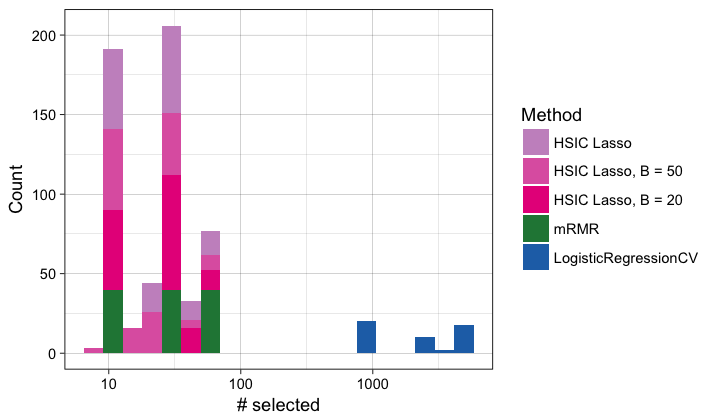

In [4]:
options(repr.plot.width=6, repr.plot.height=3.5)
predictions %>%
    ggplot(aes(selected, fill = model)) +
        geom_histogram(bins = 20) +
        theme_linedraw() +
        scale_x_log10() +
        scale_fill_manual(values = palette) +
        labs(x = '# selected', y = 'Count', fill = 'Method')

Warning message:
“Removed 30 rows containing missing values (geom_bar).”

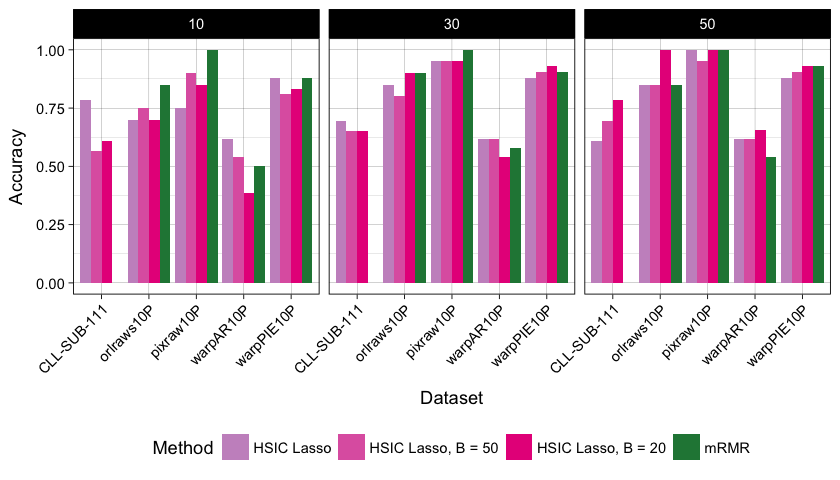

In [5]:
options(repr.plot.width=7, repr.plot.height=4)
predictions %>%
    filter(model != 'LogisticRegressionCV') %>%
    ggplot(aes(x = label, y = accuracy, fill = model)) +
        geom_bar(stat = 'identity', position = 'dodge') +
        theme_linedraw() +
        theme(legend.position = 'bottom',
              axis.text.x = element_text(angle = 45, hjust = 1)) +
        labs(x = 'Dataset', y = 'Accuracy', fill = 'Method') +
        scale_fill_manual(values = palette) +
        facet_grid(. ~ causal)